### Import the libraries

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

### Load the dataset

In [42]:
data = pd.read_csv("/content/NF-BoT-IoT.csv")
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,192.168.100.6,52670,192.168.100.1,53,17,5.212,71,126,1,1,0,4294966,0,Benign
1,192.168.100.6,49160,192.168.100.149,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1,Theft
2,192.168.100.46,3456,192.168.100.5,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0,Benign
3,192.168.100.3,80,192.168.100.55,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0,Benign
4,192.168.100.46,80,192.168.100.5,80,6,7.000,8374706,0,9086,0,0,4175916,0,Benign


In [43]:
len(data)

600100

In [44]:
data.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [45]:
data.dropna(subset=['Attack'], inplace=True)

In [46]:
data['Attack'].unique()

array(['Benign', 'Theft', 'DDoS', 'DoS', 'Reconnaissance'], dtype=object)

In [47]:
data['Attack'].value_counts()

Attack
Reconnaissance    470655
DDoS               56844
DoS                56833
Benign             13859
Theft               1909
Name: count, dtype: int64

## Without Pre-processing

In [48]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,52670,53,17,5.212,71,126,1,1,0,4294966,0
1,49160,4444,6,0.000,217753000,199100,4521,4049,24,4176249,1
2,3456,80,17,0.000,8508021,8918372,9086,9086,0,4175916,0
3,80,8080,6,7.000,8442138,9013406,9086,9086,0,4175916,0
4,80,80,6,7.000,8374706,0,9086,0,0,4175916,0


### Model creation

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Different Model with Evalaution Metrics and Visualization

In [50]:
model=LogisticRegression(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
conf_matrix = confusion_matrix(model.predict(x_train), y_train)
accuracy = accuracy_score(model.predict(x_train), y_train)
precision = precision_score(model.predict(x_train), y_train, average='weighted')
recall = recall_score(model.predict(x_train), y_train, average='weighted')
f1 = f1_score(model.predict(x_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[  1698    492    499    499    158]
 [     4   5981   5943   5961      0]
 [    12     31     31     33      0]
 [ 10825  44668  44572 417127   1544]
 [     4      0      0      0      8]]

Accuracy: 0.7866188968505249
Precision: 0.9504509863182112
Recall: 0.7866188968505249
F1 Score: 0.8573447627336959


In [52]:
# Train the model
model1 = GaussianNB().fit(x_train, y_train)
# Make predictions
y_pred = model1.predict(x_test)

In [53]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[  173    40    37  1053    13]
 [   20  5020     1   631     0]
 [   23  5165     1   599     0]
 [   45  3104   476 43410     0]
 [   15    54     0   128     2]]

Classification Report:
                precision    recall  f1-score   support

        Benign       0.63      0.13      0.22      1316
          DDoS       0.38      0.89      0.53      5672
           DoS       0.00      0.00      0.00      5788
Reconnaissance       0.95      0.92      0.93     47035
         Theft       0.13      0.01      0.02       199

      accuracy                           0.81     60010
     macro avg       0.42      0.39      0.34     60010
  weighted avg       0.79      0.81      0.79     60010


Accuracy: 0.8099650058323613
Precision: 0.9504509863182112
Recall: 0.7866188968505249
F1 Score: 0.8573447627336959


In [54]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(x_train, y_train)

MLPClassifier(random_state=0)

In [57]:
accuracy2 = accuracy_score(mlp1.predict(x_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(x_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.7867522079653391


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6447132688730239
Recall: 0.785652391268122
F1-score: 0.6932754298875611


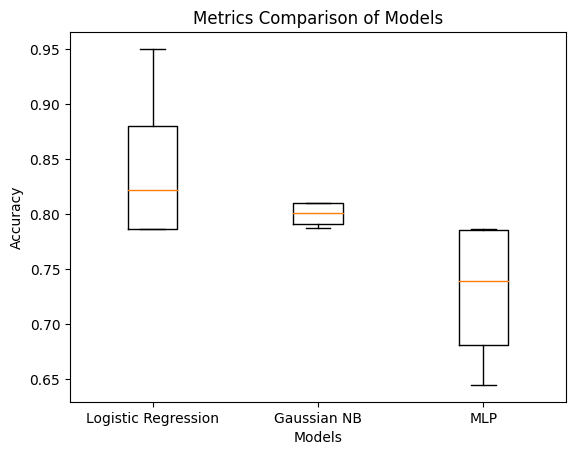

In [58]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Features contribution in the model

In [59]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Benign
Means:
FLOW_DURATION_MILLISECONDS    3.302206e+06
IN_BYTES                      3.523954e+05
OUT_BYTES                     1.560487e+05
L4_SRC_PORT                   3.142008e+04
L4_DST_PORT                   9.772634e+03
IN_PKTS                       4.359013e+02
OUT_PKTS                      1.627261e+02
L7_PROTO                      3.470853e+01
PROTOCOL                      1.241186e+01
TCP_FLAGS                     8.503149e+00
Label                         0.000000e+00
dtype: float64
Variances:
FLOW_DURATION_MILLISECONDS    3.184595e+12
IN_BYTES                      1.899075e+12
OUT_BYTES                     9.622792e+11
L4_SRC_PORT                   4.672006e+08
L4_DST_PORT                   2.943218e+08
IN_PKTS                       2.328134e+06
OUT_PKTS                      1.031465e+06
L7_PROTO                      6.365970e+03
TCP_FLAGS                     1.432929e+02
PROTOCOL                      2.952929e+01
Label        

### Ablation Analysis

In [60]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
               Feature Removed  Accuracy Score
0                  L4_SRC_PORT        0.757774
1                  L4_DST_PORT        0.786019
2                     PROTOCOL        0.786736
3                     L7_PROTO        0.788919
4                     IN_BYTES        0.786952
5                    OUT_BYTES        0.786052
6                      IN_PKTS        0.785319
7                     OUT_PKTS        0.794301
8                    TCP_FLAGS        0.785286
9   FLOW_DURATION_MILLISECONDS        0.809048
10                       Label        0.797617
Reduced Model Accuracy Range: 0.7577737043826029 - 0.8090484919180136


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


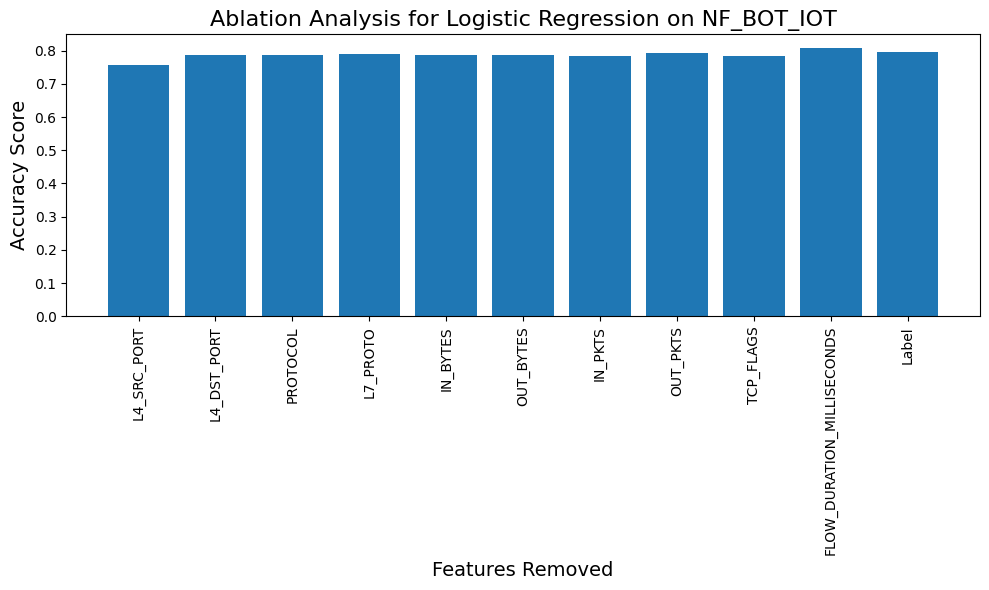

In [61]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_BOT_IOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With Preprocessing

In [62]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

Data Shape: (600100, 14)


In [63]:
check_null(data)
check_NA(data)

Data is Clean of Null values.
Data is Clean of NA.


In [64]:
print(data.duplicated().sum(), "fully duplicate rows to remove")
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

0 fully duplicate rows to remove


(600100, 14)

In [65]:
X = data.drop(['Attack', 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', 'L4_SRC_PORT', 'L4_DST_PORT'], axis=1)
y = data.loc[:, 'Attack']
X.head()

,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
0,17,5.212,71,126,1,1,0,4294966,0
1,6,0.000,217753000,199100,4521,4049,24,4176249,1
2,17,0.000,8508021,8918372,9086,9086,0,4175916,0
3,6,7.000,8442138,9013406,9086,9086,0,4175916,0
4,6,7.000,8374706,0,9086,0,0,4175916,0


### Model Creation

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Normalization

In [67]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

### Different Model with Evalaution Metrics and Visualization

In [68]:
model1=LogisticRegression(random_state=0)
model1.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [69]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model1.predict(X_train_sc), y_train)
accuracy = accuracy_score(model1.predict(X_train_sc), y_train)
precision = precision_score(model1.predict(X_train_sc), y_train, average='weighted')
recall = recall_score(model1.predict(X_train_sc), y_train, average='weighted')
f1 = f1_score(model1.predict(X_train_sc), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[ 12521      0      0      0      0]
 [     0  15457  15463  15889    281]
 [     0    520    511    429    100]
 [     0  35191  35174 407197   1343]
 [     0      0      0      0     14]]

Accuracy: 0.8067173989520265
Precision: 0.9020989648197751
Recall: 0.8067173989520265
F1 Score: 0.8508905343359567


In [70]:
# Train the model
model1 = GaussianNB().fit(X_train_sc, y_train)
# Make predictions
y_pred = model1.predict(X_test_sc)

In [71]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[ 1338     0     0     0     0]
 [    0   127  5054   462    33]
 [    0   121  5052   474    38]
 [    0   112  2728 44227    73]
 [    0     0     0   133    38]]

Classification Report:
                precision    recall  f1-score   support

        Benign       1.00      1.00      1.00      1338
          DDoS       0.35      0.02      0.04      5676
           DoS       0.39      0.89      0.55      5685
Reconnaissance       0.98      0.94      0.96     47140
         Theft       0.21      0.22      0.22       171

      accuracy                           0.85     60010
     macro avg       0.59      0.61      0.55     60010
  weighted avg       0.86      0.85      0.83     60010


Accuracy: 0.8462256290618231
Precision: 0.860546660799757
Recall: 0.8462256290618231
F1 Score: 0.8302732001066955


In [72]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train_sc, y_train)

MLPClassifier(random_state=0)

In [73]:
accuracy2 = accuracy_score(mlp1.predict(X_train_sc), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test_sc)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.8487104001184987


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.841035429706529
Recall: 0.8480919846692218
F1-score: 0.8315440193323734


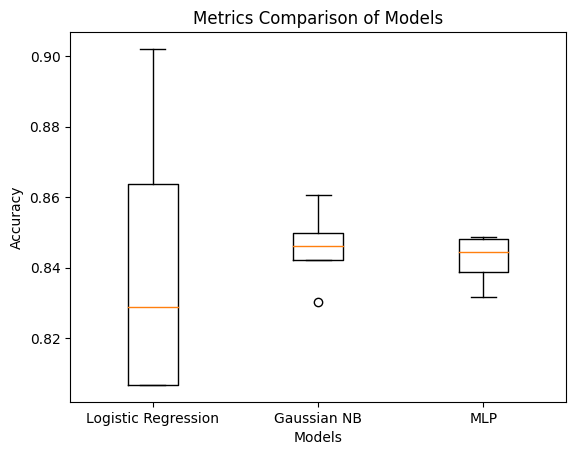

In [74]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature Contributing in the model

In [76]:
print("Features contributing to the model:")
for i, class_label in enumerate(model1.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = x_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = x_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: Benign
Means:
FLOW_DURATION_MILLISECONDS    3.292084e+06
IN_BYTES                      3.409139e+05
OUT_BYTES                     1.538957e+05
IN_PKTS                       4.238160e+02
OUT_PKTS                      1.604431e+02
L7_PROTO                      3.477180e+01
PROTOCOL                      1.245116e+01
TCP_FLAGS                     8.448207e+00
Label                         0.000000e+00
dtype: float64
Variances:
FLOW_DURATION_MILLISECONDS    3.208790e+12
IN_BYTES                      1.827320e+12
OUT_BYTES                     9.536418e+11
IN_PKTS                       2.247128e+06
OUT_PKTS                      1.020986e+06
L7_PROTO                      6.390270e+03
TCP_FLAGS                     1.425679e+02
PROTOCOL                      2.944348e+01
Label                         0.000000e+00
dtype: float64

Class: DDoS
Means:
FLOW_DURATION_MILLISECONDS    2.206822e+06
OUT_BYTES                     7.962638e+02
IN_BYTES             

### Ablation Analysis

In [77]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in X.columns:
    # Remove the current feature
    reduced_features = X.drop(feature, axis=1)

    x_train, x_test, y_train, y_test = train_test_split(reduced_features, y, test_size=0.1)

    # Train a new model without the feature
    model = LogisticRegression(random_state=0)
    model.fit(x_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(x_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ablation Analysis Results:
              Feature Removed  Accuracy Score
0                    PROTOCOL        0.701866
1                    L7_PROTO        0.703083
2                    IN_BYTES        0.770938
3                   OUT_BYTES        0.715664
4                     IN_PKTS        0.702616
5                    OUT_PKTS        0.707065
6                   TCP_FLAGS        0.701733
7  FLOW_DURATION_MILLISECONDS        0.812415
8                       Label        0.703683
Reduced Model Accuracy Range: 0.7017330444925846 - 0.8124145975670721


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


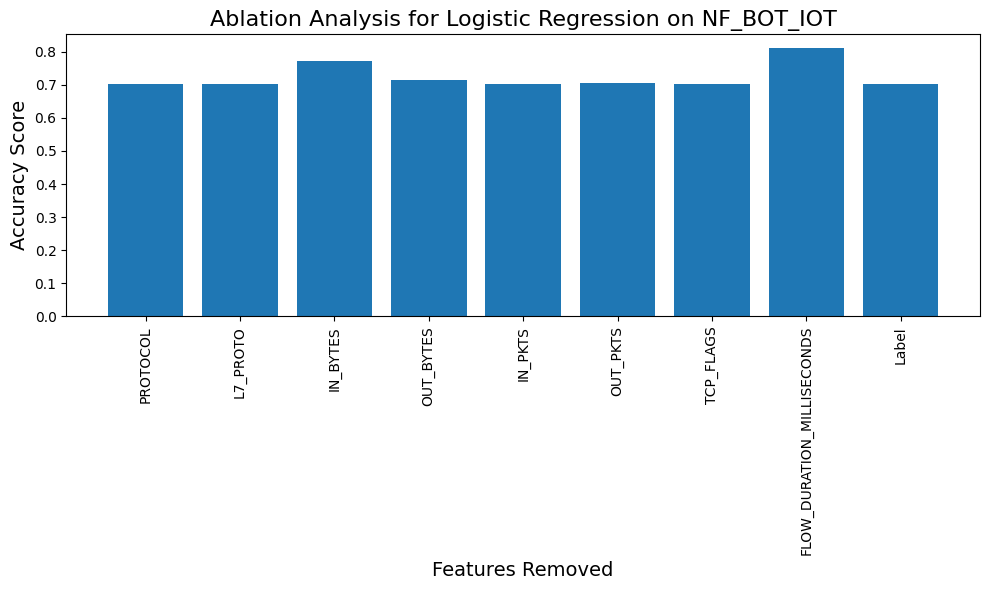

In [78]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Logistic Regression on NF_BOT_IOT", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()